# Computer Vision Notebook

## Image Processing:

This notebook contains image processing techniques using OpenCV.

In [2]:
# This notebook is for Image Processing using OpenCV4.

import cv2 as cv
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import copy
%matplotlib inline

print(cv.__version__)

4.4.0


In [3]:
#Open and access the shape of the image.

image=cv.imread('images/bunny.png')
# Print the tuple.
print(image.shape)

print(' Height',image.shape[0],'\n Width',image.shape[1],
      'Channels',image.shape[2])

(1080, 1920, 3)
 Height 1080 
 Width 1920 Channels 3


In [4]:
cv.imshow('Image',image)


#Wait for key.
cv.waitKey(0)
cv.destroyAllWindows()

#Convert the image to JPEG
cv.imwrite('images/bunny_convert.jpg',image)

True

## Color Spaces:

-1

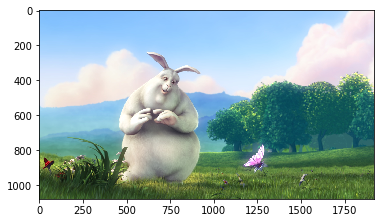

In [5]:
# Image processing 
image=cv.imread('images/bunny_convert.jpg')
# Convert from BGR to RGB
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image)

#GrayScaling
image_gray=cv.cvtColor(image,cv.COLOR_RGB2GRAY)
cv.imshow('GrayScale',image_gray)
cv.waitKey(0)


181
[131 193 254]
255 9


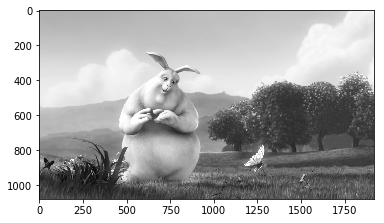

In [6]:
#Access pixel values
x=64
y=64

#GrayScale
pixel=image_gray[y,x]
print(pixel)
#RGB BGR
pixel=image[y,x]
print(pixel)

#Max and Min 
max=np.amax(image_gray)
min=np.amin(image_gray)
print(max,min)

plt.imshow(image_gray,cmap='gray')

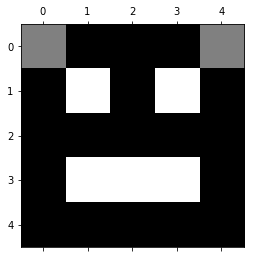

In [7]:
#Pixel Map for a robot face.
image2= np.array([[128, 0, 0, 0, 128],
                  [0, 255, 0, 255, 0],
                  [0, 0, 0, 0, 0],
                  [0, 255, 255, 255,0],
                  [0, 0, 0, 0, 0]])
plt.matshow(image2, cmap='gray')

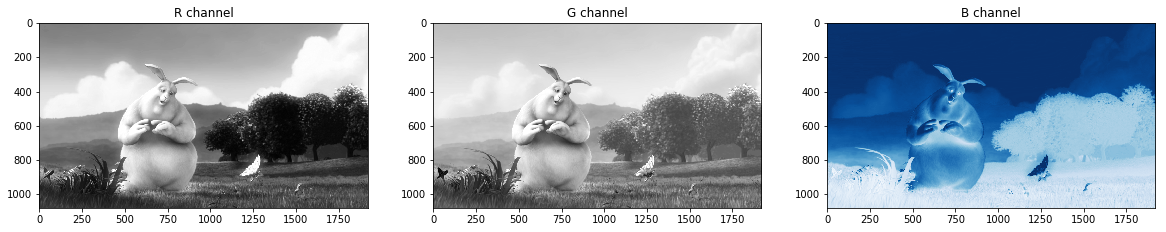

In [8]:
#Color Channels in GrayScale.
red=image[:,:,0]
green=image[:,:,1]
blue=image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(red,cmap='gray')
ax2.set_title('G channel')
ax2.imshow(green,cmap='gray')
ax3.set_title('B channel')
ax3.imshow(blue,cmap='Blues')

(1080, 1920)


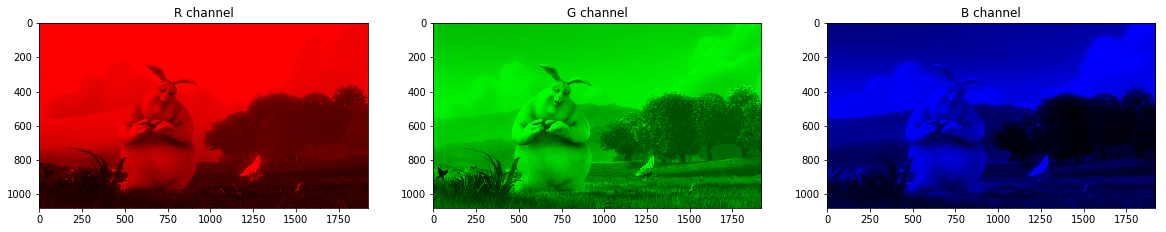

In [9]:
#Visualize each color channel as R G B 
# BGR in OpenCV.
blue,green,red=cv.split(image)

print(image.shape[:2])

zeros=np.zeros(image.shape[:2] , dtype = "uint8")

#cv.imshow('Red',cv.merge([zeros,zeros,red]))
#cv.waitKey(0)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(cv.merge([red,zeros,zeros]))
ax2.set_title('G channel')
ax2.imshow(cv.merge([zeros,green,zeros]))
ax3.set_title('B channel')
ax3.imshow(cv.merge([zeros,zeros,blue]))

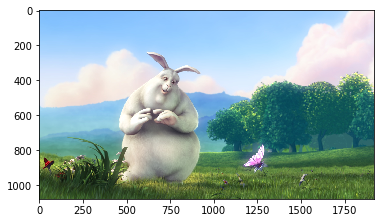

In [10]:
#Color spaces.
image_rgb=np.copy(image)

#image_rgb=cv.cvtColor(image_rgb,cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

255 0


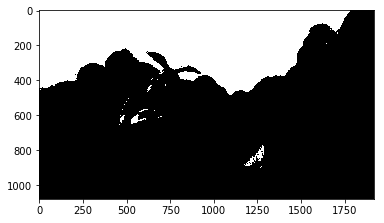

In [11]:
#Color Thresholding and masks in RGB color space.

#Max and Min 
max=np.amax(image_rgb)
min=np.amin(image_rgb)
print(max,min)

lower_thresh=np.array([40,40,250])
upper_thresh=np.array([255,255,255])

#Create a mask
mask=cv.inRange(image_rgb, lower_thresh,upper_thresh)

plt.imshow(mask,cmap='gray')

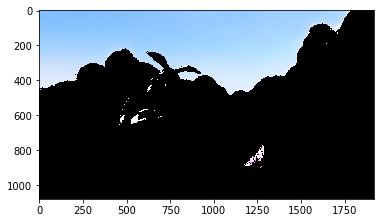

In [12]:
#Operate on the mask, allow the mask
masked_image=np.copy(image_rgb)
masked_image[mask == 0]= [0,0,0]
plt.imshow(masked_image)

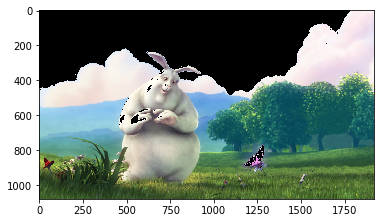

In [13]:
#Operate on the mask, block the mask
masked_image=np.copy(image_rgb)
masked_image[mask != 0]= [0,0,0]
plt.imshow(masked_image)
# A complex image does not have distinct RGB components.

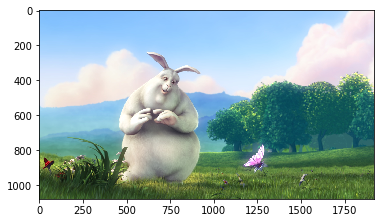

In [14]:
# try to replace sky with another image.
#image_bg=cv.imread('images/hill.jpg')
#Scale the image
#scale_y=image_rgb.shape[0]
#scale_x=image_rgb.shape[1]
#print(scale_y,scale_x)
#image_bg=image_bg[0:image_rgb.shape[1],0:image_rgb.shape[0]]
#print(image_bg.shape)

#Reconstruct the image back. If possible replace the mask area with another image[same size].
image_rgb[mask==0]=[0,0,0]
image_rgb=image_rgb+masked_image

plt.imshow(image_rgb)

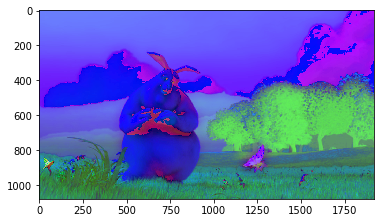

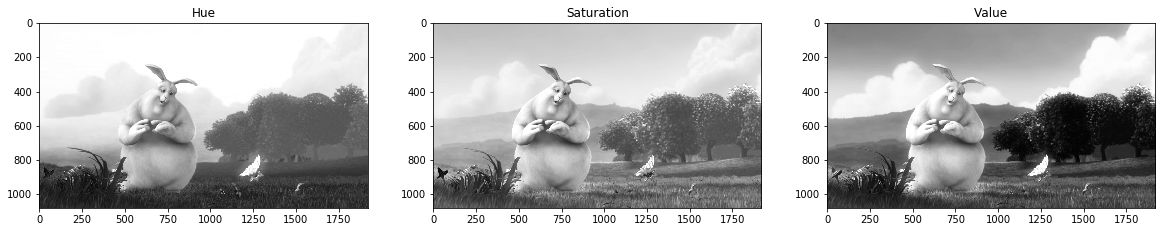

In [15]:
#HSV color space. [Hue, Saturation, Value]
image_hsv=np.copy(image)

image_hsv=cv.cvtColor(image_hsv,cv.COLOR_RGB2HSV)

hue=image_hsv[:,:,0]
saturation=image_hsv[:,:,1]
value=image_hsv[:,:,2]
plt.imshow(image_hsv)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Hue')
ax1.imshow(red,cmap='gray')
ax2.set_title('Saturation')
ax2.imshow(green,cmap='gray')
ax3.set_title("Value")
ax3.imshow(blue,cmap='gray')


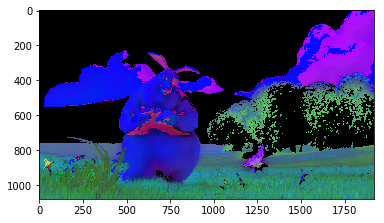

In [16]:
#Thresholding and mask in HSV space.

#HSV color space. [Hue, Saturation, Value]
image_hsv=np.copy(image)

image_hsv=cv.cvtColor(image_hsv,cv.COLOR_RGB2HSV)

lower_hue=np.array([90,0,0])
upper_hue=np.array([120,255,255])

mask_hsv=cv.inRange(image_hsv,lower_hue,upper_hue)

image_hsv[mask_hsv!=0]=[0,0,0]

plt.imshow(image_hsv)

1080 1920


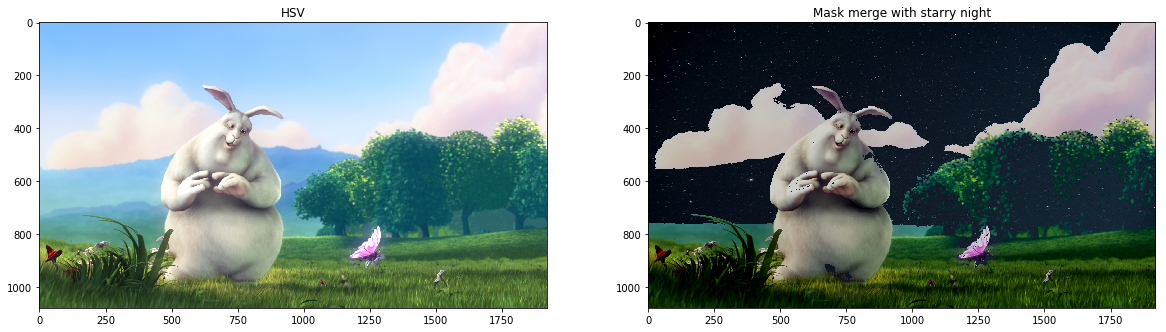

In [17]:
#Convert HSV to BGR for OpenCV.

image_hsv_bgr=cv.cvtColor(image_hsv,cv.COLOR_HSV2RGB)


image_stars=cv.imread('images/stars.jpg')
image_stars=cv.cvtColor(image_stars,cv.COLOR_BGR2RGB)
print(image.shape[0],image.shape[1])
image_stars=cv.resize(image_stars,(image.shape[1],image.shape[0]))

image_stars[mask_hsv==0]=[0,0,0]

image_hsv_bgr=image_hsv_bgr+image_stars

subtract_mask=np.ones(image.shape,dtype='uint8')*50

image_hsv_bgr=cv.subtract(image_hsv_bgr,subtract_mask)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('HSV')
ax1.imshow(image,cmap='gray')
ax2.set_title('Mask merge with starry night')
ax2.imshow(image_hsv_bgr,cmap='gray')

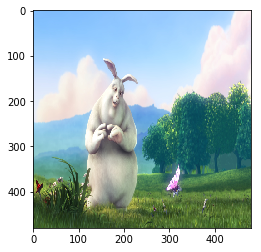

In [18]:
image=cv.resize(image,(480,480))
plt.imshow(image)

In [19]:
#Average brightness of hsv
avg_v=np.sum(image_hsv[:,:,2])
avg_v=avg_v/(image_hsv.shape[0]*image_hsv.shape[1])
print('Average Brightness',avg_v)

Average Brightness 87.72372926311728


## Image Manipulation:
### Translation, Rotation and Transformation:

480 480


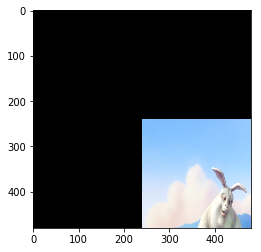

In [20]:
# Translation
height, width=image.shape[:2]
print(height,width)

half_h, half_w= height/2, width/2

# Translation matrix: 
# [ 1 0 Tx]
# [ 0 1 Ty]

tm=np.float32([[1,0,half_w],[0,1,half_h]])
img_tx=cv.warpAffine(image,tm,(width,height))
plt.imshow(img_tx)

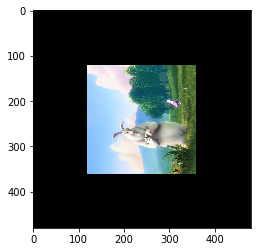

In [21]:
#Rotation
#Rotation Matrix
#[cosT -sinT]
#[sinT cosT]

#Rotation centre is image centre.
rm=cv.getRotationMatrix2D((half_w,half_h),90,0.5)
img_tx=cv.warpAffine(image,rm,(width,height))
plt.imshow(img_tx)

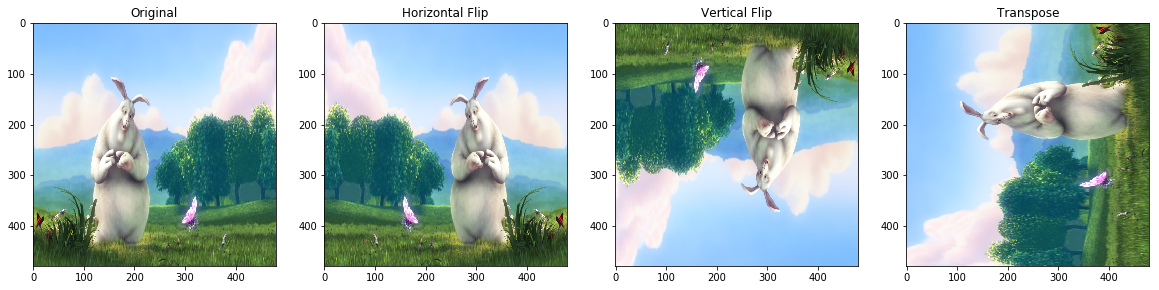

In [22]:
#Horizontal and vertical flip
img_hflip=cv.flip(image,1)
img_vflip=cv.flip(image,-1)
img_t=cv.transpose(image)
f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(image)
ax2.set_title('Horizontal Flip')
ax2.imshow(img_hflip)
ax3.set_title("Vertical Flip")
ax3.imshow(img_vflip)
ax4.set_title("Transpose")
ax4.imshow(img_t)

### Scaling, Resizing and Interpolation:

In [23]:
#Default interpolation is INTER_LINEAR
#Open Image again.

image=cv.imread('images/bunny_convert.jpg')

#For imshow
#image=cv.cvtColor(image,cv.COLOR_BGR2RGB)

image_linear=cv.resize(image,None, fx=2,fy=2, interpolation=cv.INTER_LINEAR)

image_cubic=cv.resize(image,None, fx=2,fy=2,interpolation=cv.INTER_CUBIC)

image_nearest=cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_NEAREST)

image_area=cv.resize(image,None, fx=2, fy=2, interpolation=cv.INTER_AREA)

image_lanczos4=cv.resize(image,None, fx=2, fy=2, interpolation=cv.INTER_LANCZOS4)

# f, (ax1, ax2, ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))
# ax1.set_title('Original')
# ax1.imshow(image)
# ax2.set_title('Linear')
# ax2.imshow(image_linear)
# ax3.set_title("Cubic")
# ax3.imshow(image_cubic)
# ax4.set_title("Nearest")
# ax4.imshow(image_nearest)
# ax5.set_title("Area")
# ax5.imshow(image_area)
# ax6.set_title("Lanczos4")
# ax6.imshow(image_lanczos4)


cv.imshow('Original',image)
#cv.waitKey(0)

cv.imshow('Linear',image_linear)
#cv.waitKey(0)

cv.imshow('Cubic',image_cubic)
#cv.waitKey(0)

cv.imshow('Nearest',image_nearest)
#cv.waitKey(0)

cv.imshow('Area',image_area)
#cv.waitKey(0)

cv.imshow('Lanczos4',image_lanczos4)
cv.waitKey(0)


-1

In [24]:
#Image Pyramids:
scale_down=cv.pyrDown(image)
scale_up=cv.pyrUp(image)

cv.imshow("Scale Up",scale_up)
cv.imshow("Scale Down",scale_down)
cv.waitKey(0)

-1

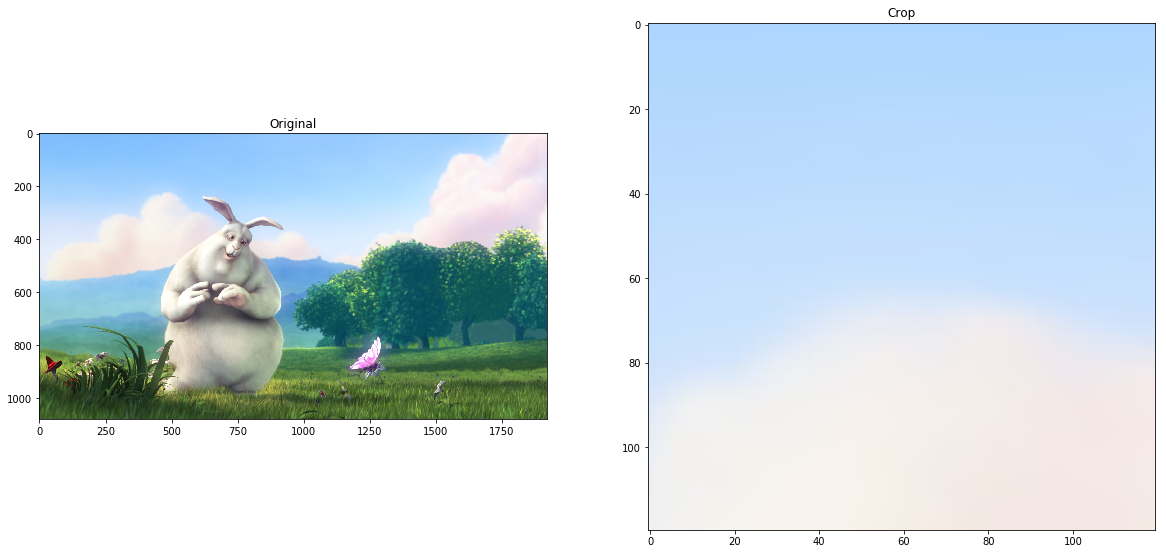

In [25]:
#Cropping

plt_image=np.copy(image)
plt_image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
crop=plt_image[int(0.5*height):int(0.75*height),int(0.5*width):int(0.75*width)]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(plt_image)
ax2.set_title('Crop')
ax2.imshow(crop)

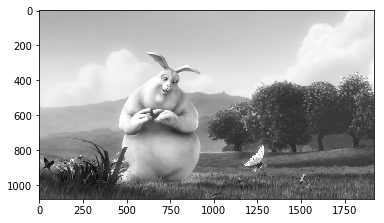

In [26]:
#Grayscale image read.
gray_img=cv.imread('images/bunny_convert.jpg',0)
plt.imshow(gray_img,cmap='gray')

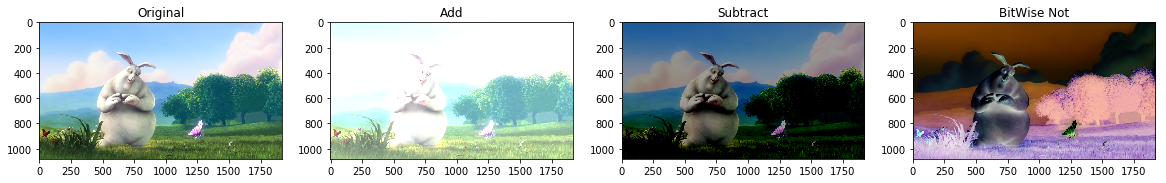

In [27]:
#Mathematical Operations.
M = np.ones(image.shape, dtype = "uint8") * 100 
add_img=cv.add(plt_image,M)
sub_img=cv.subtract(plt_image,M)
not_img=cv.bitwise_not(plt_image)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(plt_image)
ax2.set_title('Add')
ax2.imshow(add_img)
ax3.set_title('Subtract')
ax3.imshow(sub_img)
ax4.set_title('BitWise Not')
ax4.imshow(not_img)


###  Convolutional Filters:

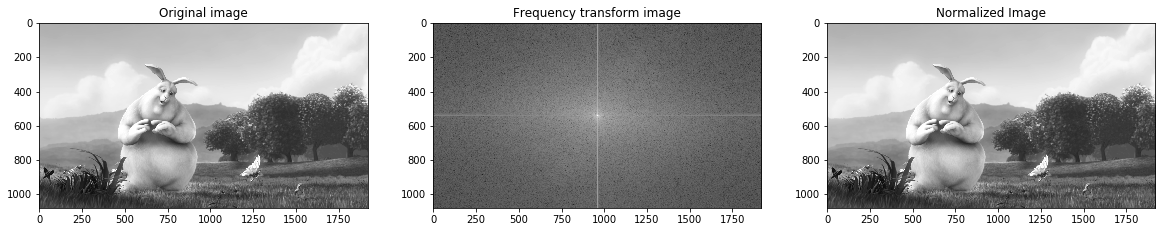

In [28]:
#Fourier Transforms
#FFT

#Normalize the image.
norm_image=gray_img/255.0

#Function for FFT on the normalized image.
def fourier_transform(norm_image):
    fq=np.fft.fft2(norm_image)
    fshift=np.fft.fftshift(fq)
    freqtx=20*np.log(np.abs(fshift))
    return freqtx

ft_norm_img=fourier_transform(norm_image)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Original image')
ax1.imshow(gray_img, cmap='gray')
ax2.set_title('Frequency transform image')
ax2.imshow(ft_norm_img, cmap='gray')
ax3.set_title("Normalized Image")
ax3.imshow(norm_image, cmap='gray')



### Sobel Filters (Gradients):
High Pass Filters.

-1

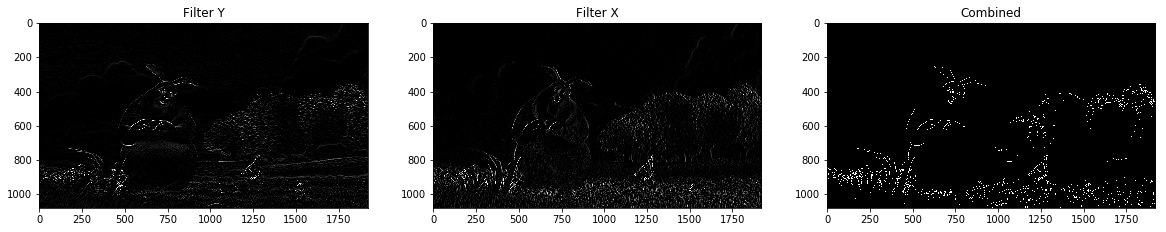

In [29]:
#Sobel filter.
#Sobel X
# [-1 0 1]
# [-2 0 2]
# [-1 0 1]

#Sobel Y
# [-1 -2 -1]
# [0 0 0]
# [1 2 1]


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


sobel_x=np.array([[-1, 0, 1],
                  [-2,0,2],
                   [-1,0,1]])

#Horizontal edge detection
filter_y=cv.filter2D(gray_img, -1, sobel_y)

#Vertical edge detection
filter_x =cv.filter2D(gray_img, -1, sobel_x)

#Combine 2 edge dectection outputs.
filter_combined=filter_x+filter_y

#Threshold the filter output.
ret, filter_thresh=cv.threshold(filter_combined,100,255,cv.THRESH_BINARY)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.imshow(filter_y,cmap='gray')
ax2.imshow(filter_x,cmap='gray')
ax1.set_title('Filter Y')
ax2.set_title('Filter X')
ax3.set_title('Combined')
ax3.imshow(filter_thresh,cmap='gray')

filter_x=cv.resize(filter_x,(600,600))
filter_y=cv.resize(filter_y,(600,600))
cv.imshow("Vertical edge x direction",filter_x)
cv.imshow("Horizontal edge y direction",filter_y)
cv.waitKey(0)

### OpenCV Sobel and Laplacian Filters

In [30]:
#OpenCV functions for High Pass Filters.
gray_filter=np.copy(gray_img)
gray_filter=cv.resize(gray_filter,(400,400))
#ret,gray_img=cv.threshold(gray_img,12,255,cv.THRESH_BINARY_INV)
sobel_x=cv.Sobel(gray_filter,cv.CV_64F,0,1,ksize=3)
sobel_y=cv.Sobel(gray_filter,cv.CV_64F,1,0,ksize=3)

sobel_merge=cv.bitwise_or(sobel_x,sobel_y)
sobel_merge=sobel_merge/255.0
laplacian=cv.Laplacian(gray_filter,cv.CV_64F)

cv.imshow('SobelX',sobel_x)
cv.imshow('SobelY',sobel_y)
cv.imshow('Sobel Merge',sobel_merge)
cv.imshow('Laplacian',laplacian)
cv.waitKey(0)

c:\users\arv\miniconda3\envs\cv-nd\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


-1

### Low Pass Filters:

In [31]:
#Blurring
gray_img=cv.resize(gray_img,(600,600))
gray_average=cv.blur(gray_img,(5,5))

#Set 0 to automatically calculate standard deviation.
gray_gaussian=cv.GaussianBlur(gray_img,(5,5),0)

gray_median=cv.medianBlur(gray_img,5)

gray_bilateral=cv.bilateralFilter(gray_img,9,75,75)

cv.imshow("Average",gray_average)
cv.imshow("Gaussain",gray_gaussian)
cv.imshow("Median",gray_median)
cv.imshow("Bilateral",gray_bilateral)
cv.waitKey(0)

-1

In [32]:
#DeNoising.
noise_img=np.copy(image)
noise_img=cv.resize(noise_img,(600,600))
dst = cv.fastNlMeansDenoisingColored(noise_img, None, 6, 6, 7, 21)
cv.imshow("Original",noise_img)
cv.imshow('Fast Means Denoising', dst)
cv.waitKey(0)

-1

In [33]:
#Sharpening
sharp_img=np.copy(image)
sharp_kernel=np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [ 1,-1,-1]])

sharp_img=cv.filter2D(sharp_img,-1, sharp_kernel)
sharp_img=cv.resize(sharp_img,(600,600))
cv.imshow("Original",image)
cv.imshow("Sharpen",sharp_img)
cv.waitKey(0)

-1

In [34]:
#Binarization, Thresholding and Adaptive Thresholding
#From Hands on Computer Vision with OpenCV4, Keras and TensorFlow 2.0 - Udemy.
img_thresh=np.copy(image)
img_thresh=cv.cvtColor(img_thresh,cv.COLOR_BGR2GRAY)
img_thresh=cv.resize(img_thresh,(400,400))

# Inverse Thresholding
ret,thresh2 = cv.threshold(img_thresh, 127, 255, cv.THRESH_BINARY_INV)
cv.imshow('Threshold Binary Inverse', thresh2)

# Upper bound of values is set at 127, below 127 can have different values.
ret,thresh3 = cv.threshold(img_thresh, 127, 255, cv.THRESH_TRUNC)
cv.imshow('THRESH TRUNC', thresh3)

# Values below threshold are set to zero, values above threshold maintain same values.
ret,thresh4 = cv.threshold(img_thresh, 127, 255, cv.THRESH_TOZERO)
cv.imshow('THRESH TOZERO', thresh4)

# Below threshold values remain, above threshold go to zero.
ret,thresh5 = cv.threshold(img_thresh, 127, 255, cv.THRESH_TOZERO_INV)
cv.imshow('THRESH TOZERO INV', thresh5)

#Blur the image for adaptive thresholding.
img_thresh = cv.GaussianBlur(img_thresh, (3, 3), 0)

# Adaptive thresholding mean
thresh = cv.adaptiveThreshold(img_thresh, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, 5) 
cv.imshow("Adaptive Mean Thresholding", thresh) 

#Adaptive thresholding Gaussian.

thresh = cv.adaptiveThreshold(img_thresh, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 3, 5) 
cv.imshow("Adaptive Gaussian Thresholding", thresh) 

#Otsu.
_, th2 = cv.threshold(img_thresh, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
cv.imshow("Otsu's Thresholding", th2) 
cv.waitKey(0) 





-1

### Filter Visualization
From Lesson 13 of Convolutional Filters and Edge Detection from Udacity- CV Nano Degree.

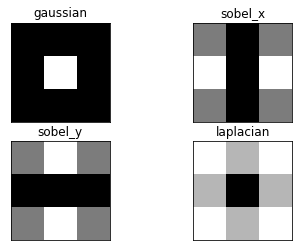

In [35]:
# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

### Dilation, Erosion, Opening and Closing:

-1

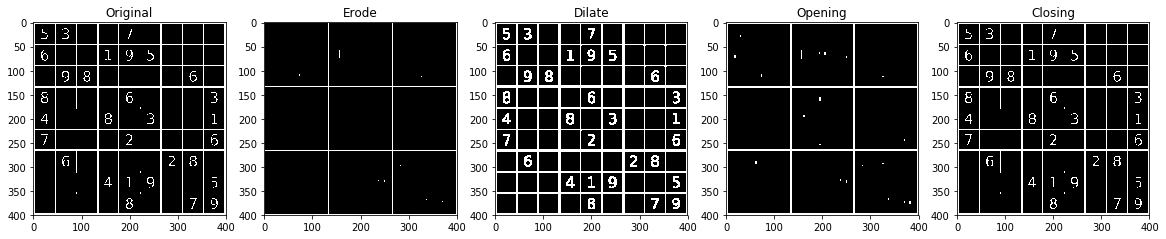

In [36]:
#Open sudoku image.
image=cv.imread('images/sudoku.jpg',0)
image=cv.resize(image,(400,400))

#Invert the image for dilation and erosion.
ret, image=cv.threshold(image,12,255,cv.THRESH_BINARY_INV)

#Create a kernel.
kernel=np.ones((3,3),np.uint8)

#Erosion
erode=cv.erode(image,kernel, iterations=1)
#Dilation
dilate=cv.dilate(image,kernel,iterations=1)

#Opening
opening=cv.morphologyEx(image,cv.MORPH_OPEN,kernel)
closing=cv.morphologyEx(image,cv.MORPH_CLOSE,kernel)

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(20,10))
ax1.imshow(image,cmap='gray')
ax2.imshow(erode,cmap='gray')
ax3.imshow(dilate,cmap='gray')
ax4.imshow(opening,cmap='gray')
ax5.imshow(closing,cmap='gray')
ax1.set_title('Original')
ax2.set_title('Erode')
ax3.set_title('Dilate')
ax4.set_title('Opening')
ax5.set_title('Closing')
cv.imshow('original',image)
cv.waitKey()

## Edge Detection: [Canny]

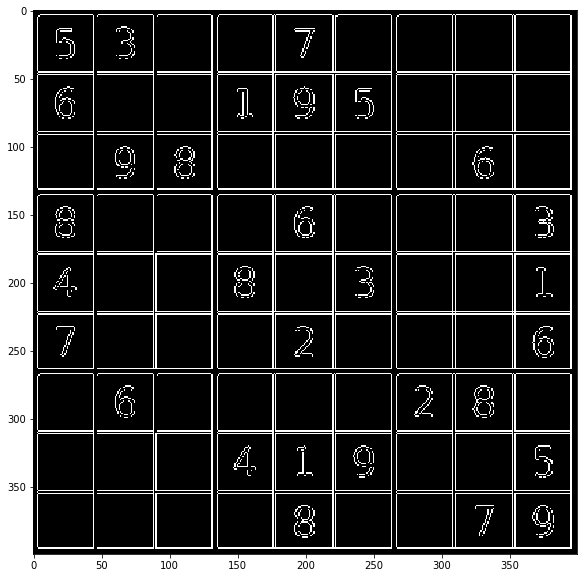

In [37]:
#Set lower and upper thresholds.
#Usually a scale of 2.
lower=120
upper=240

canny_edge=cv.Canny(image,lower,upper)
plt.figure(figsize=(20,10))
plt.imshow(canny_edge, cmap='gray')

### Hough Spaces:



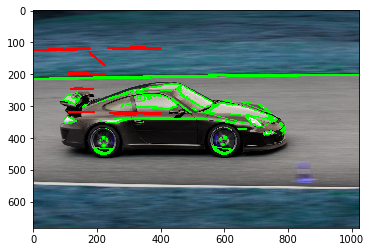

In [44]:
# Step 1 :Detect edges using Canny.
# Step 2 :Find lines using Hough Transform.
# Step 3 :Overlay lines on original image.

rho = 1 # 1 Pixel
theta = np.pi/180 # 1 degree.
threshold = 60 # Minimum intersections in Hough space to detect a line.
min_line_length = 50
max_line_gap = 5 #Gap between discontinuous Line segments.

line_image = np.copy(image) 

#HoughLines.(Probabilistic)

hough_lines=cv.HoughLinesP(canny_edge, rho, theta, threshold,np.array([]), min_line_length, max_line_gap )

for line in hough_lines:
    for x1,y1,x2,y2 in line:
        cv.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image,cmap='gray')

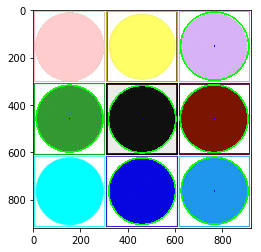

In [39]:
#Circle Detection using Hough Transforms.

image_circle=cv.imread('images/circles.jpg')
plt.imshow(image_circle)

image_circle_gray=cv.cvtColor(image_circle,cv.COLOR_BGR2GRAY)
circle_out=np.copy(image_circle)

image_circle=cv.GaussianBlur(image_circle_gray,(5,5),0)

circles=cv.HoughCircles(image_circle_gray, cv.HOUGH_GRADIENT,1,minDist=45,param1=70,param2=80,minRadius=20,maxRadius=200)

circles=np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(circle_out,(i[0],i[1]),i[2],(0,255,0),5)
    # draw the center of the circle
    cv.circle(circle_out,(i[0],i[1]),2,(0,0,255),2)
    
plt.imshow(circle_out,cmap='gray')

### HAAR Cascades:

In [40]:
#Use Video feed to detect Face and Eyes.
#Press Enter key to exit.
#Code referenced from Hands on Computer Vision with OpenCV4, Keras and TensorFlow 2.0 - Udemy.

#Load the classifier
face_classifier=cv.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier=cv.CascadeClassifier('Haarcascades/haarcascade_eye.xml')


#Function to detect face and eyes.
def haar_cascade_detector(image, size=0.5):
    gray_img=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    face_detect=face_classifier.detectMultiScale(gray_img,1.3,5)
    #If no face is detected, return.
    if face_detect is ():
        return image
    
    #Draw bounding box over face.
    for (x,y,w,h) in face_detect:
        cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        
        #Detect eyes.
        #Define ROI 
        roi_gray=gray_img[y:y+h,x:x+w]
        roi_color=image[y:y+h,x:x+w]
        
        eye_detect=eye_classifier.detectMultiScale(roi_gray,1.3,6)
        #Draw bounding box over eyes.
        
        for (x1,y1,w1,h1) in eye_detect:
            cv.rectangle(roi_color,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
         
       
    return image

#Start camera stream.
capture=cv.VideoCapture(0)

while True:
    ret, frame=capture.read()
    cv.imshow("HAAR Cascades",haar_cascade_detector(frame))
    if cv.waitKey(1) ==13:
        break
        
capture.release()
cv.destroyAllWindows()        

## Corner Detection:


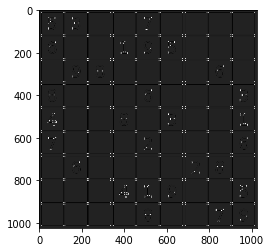

In [41]:
#Harris Corner Detection.
image_circle_gray=cv.imread('images/sudoku.jpg',0)
image_circle_gray=np.float32(image_circle_gray)

# Size of neighborhood -> 2, Size of Sobel filter=3
dst=cv.cornerHarris(image_circle_gray,4,5,0.04)
dst=cv.dilate(dst,None)
plt.imshow(dst,cmap='gray')


## Contours:

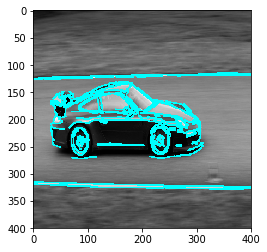

In [42]:
#Find and display Contours.

car_image=cv.imread('images/car.jpg',0)


car_image=cv.resize(car_image,(400,400))
car_image_rgb=cv.cvtColor(car_image,cv.COLOR_GRAY2RGB)
#Pre Process the image to be binary, either threshold it or use Canny.

#retval,car_image=cv.threshold(car_image,127,255,cv.THRESH_BINARY)

lower=120
upper=240

canny_edge=cv.Canny(car_image,lower,upper)

# 3 return values in OpenCV 3 and below.!!
#retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours, hierarchy = cv.findContours(canny_edge,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)


#Draw Contours
#color - BGR
car_image=cv.drawContours(car_image_rgb,contours,-1,(0,255,255),thickness=2)
plt.imshow(car_image_rgb)

In [43]:
#Sorting and Approximating Contours.

#Convex Hull.

image = cv.imread('images/car.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv.imshow('Original Image', image)
cv.waitKey(0) 

# Threshold the image
ret, thresh = cv.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv.findContours(thresh.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv.convexHull(c)
    cv.drawContours(image, [hull], 0, (0, 255, 0), 2)
    cv.imshow('Convex Hull', image)

cv.waitKey(0)    
cv.destroyAllWindows()


#PolyDP: Approximate Contours.
copy = image.copy()

# Iterate through each contour 
for c in contours:
    #x,y,w,h = cv2.boundingRect(c)
    #cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    cv.drawContours(image, [c], 0, (0, 255, 0), 2)
    cv.imshow('Bounding Rectangle', image)

cv.waitKey(0) 

# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, accuracy, True)
    cv.drawContours(copy, [approx], 0, (0, 255, 0), 2)
    cv.imshow('Approx Poly DP', copy)
    
cv.waitKey(0) 
cv.destroyAllWindows()

### Blob Detection:

In [59]:
#Detect blobs:
image_blob=cv.imread('images/blobs.png')

blob_detect=cv.SimpleBlobDetector_create()

keypoints=blob_detect.detect(image_blob)

zero_out=np.zeros((1,1))

blob=cv.drawKeypoints(image_blob,keypoints,zero_out,(255,0,255),cv.DRAW_MATCHES_FLAGS_DEFAULT)
#plt.figure(figsize=(20,10))
#plt.imshow(blob)
cv.imshow('blob',blob)
cv.waitKey()


-1

### K-Means Clustering:

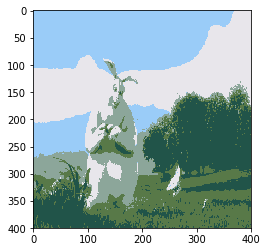

In [69]:
#Prepare the image for clustering
image=cv.imread('images/bunny_convert.jpg')
image=cv.resize(image,(400,400))
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)

#Reshape the image into a 2D array (m,c)
reshape_image=image.reshape((-1,3))
#Convert to float.
reshape_image=np.float32(reshape_image)

#epsilon-> clusters move less that this value, hence stop the clustering as it has converged.

criteria=(cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,10,1)
k=5
#None - No labels.
retval, labels, centers=cv.kmeans(reshape_image,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
centers=np.uint8(centers)
segmented_data=centers[labels.flatten()]

segmented_image=segmented_data.reshape((image.shape))
labels_reshape=labels.reshape(image.shape[0],image.shape[1])
plt.imshow(segmented_image)

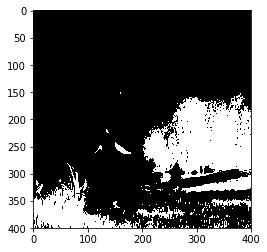

In [84]:
plt.imshow(labels_reshape==0,cmap='gray')

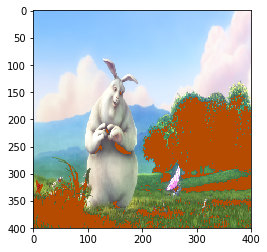

In [85]:
#Change green to orange
cluster=0
mask_image=np.copy(image)
mask_image[labels_reshape==cluster]=[180,75,0]
plt.imshow(mask_image)

## Feature Matching:
### ORB [Oriented FAST and Rotated BRIEF]:
FAST: Features from Accelerated Segments Test.
BRIEF : Binary Robust Independent Elementary Features

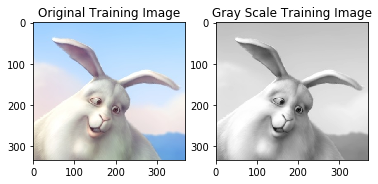

In [98]:
#Train image.
# Load the training image
image = cv.imread('images/bunny_train.jpg')

training_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

training_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Display the images
plt.subplot(121)
plt.title('Original Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray Scale Training Image')
plt.imshow(training_gray, cmap = 'gray')
plt.show()

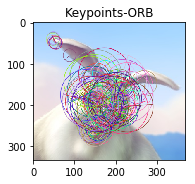

In [107]:
#Create ORB descriptors.
import copy
#Setup ORB.
#nfeatures=400, scaleFactor=2.0
orb=cv.ORB_create(400,2.0)


#Find the keypoints.
keypoints, descriptor=orb.detectAndCompute(training_gray,None)
keyp_with_size=copy.copy(training_image)

cv.drawKeypoints(training_image,keypoints, keyp_with_size,flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(122)
plt.title('Keypoints-ORB')
plt.imshow(keyp_with_size)
plt.show()

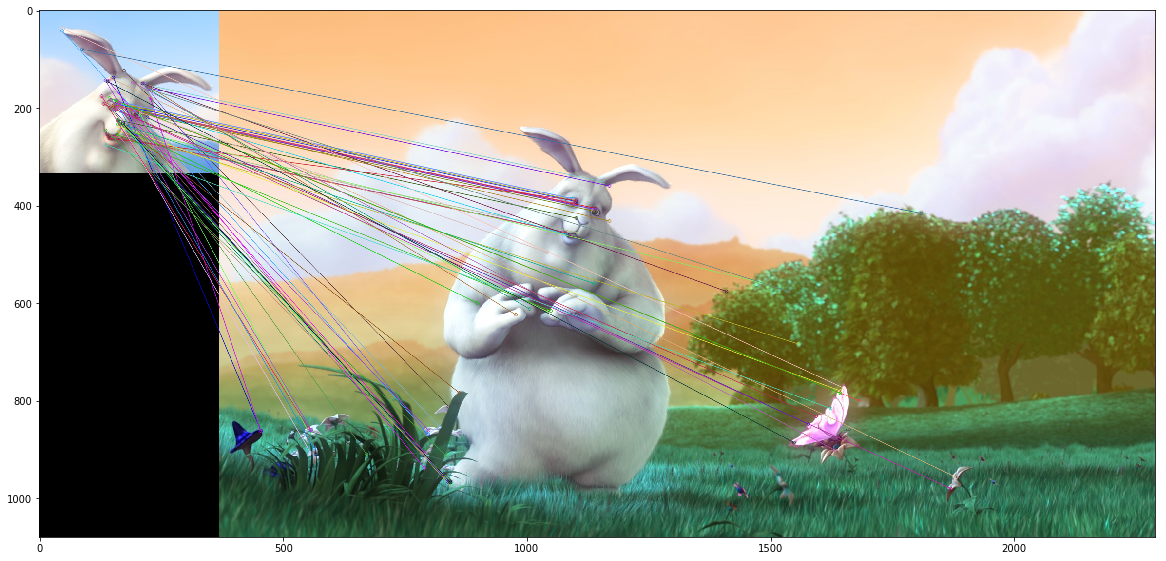

In [110]:
#Object Detection using ORB:
query_image=cv.imread('images/bunny_convert.jpg')
query_image_gray=cv.cvtColor(query_image,cv.COLOR_BGR2GRAY)

keypoints_q, descriptor_q=orb.detectAndCompute(query_image_gray,None)
keyp_with_size_q=copy.copy(query_image)

#Hamming Distance.
bf=cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
matches=bf.match(descriptor,descriptor_q)
matches=sorted(matches, key= lambda x:x.distance)

result=cv.drawMatches(training_image,keypoints,query_image,keypoints_q,matches[:85], query_image, flags = 2)
plt.figure(figsize=(20,10))
plt.imshow(result)